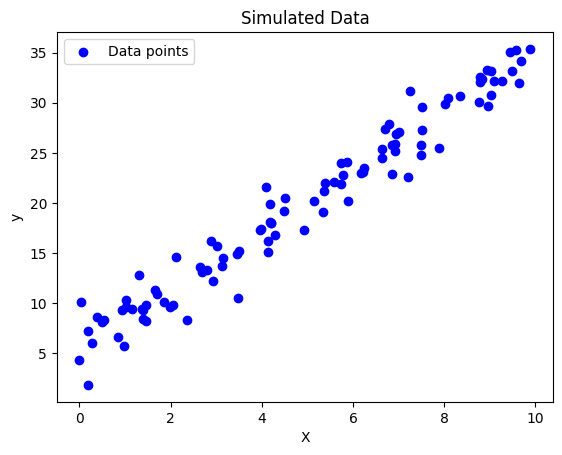

Slope (coefficient of X): 2.936985017531063
Intercept: 5.473914508297824


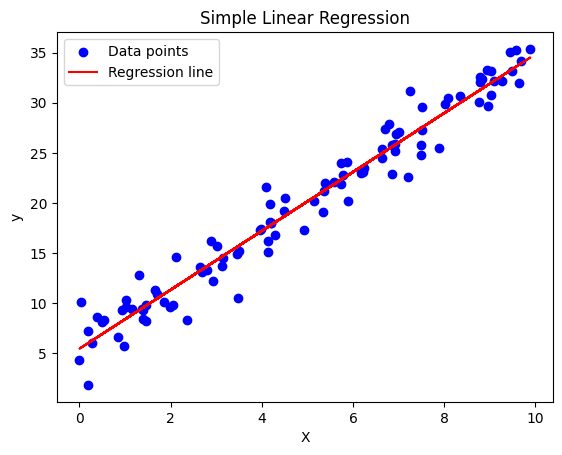

Mean Squared Error: 3.199047462404632


In [30]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Set the random seed for consistency
np.random.seed(1)

# Part (a): Generate simulated data
# Number of data points
n = 100
# Generate independent variable (X)
X = np.random.rand(n, 1) * 10  # X values between 0 and 10
# Generate noise
noise = np.random.randn(n, 1) * 2
# Generate dependent variable (y) based on the formula y = 3X + 5 + noise
y = 3 * X + 5 + noise

# Plot the data
plt.scatter(X, y, color='blue', label='Data points')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Simulated Data')
plt.legend()
plt.show()

# Part (b): Fit a simple linear regression model
# Initialize the model
model = LinearRegression()
# Fit the model to the data
model.fit(X, y)

# Print model coefficients (slope and intercept)
print(f"Slope (coefficient of X): {model.coef_[0][0]}")
print(f"Intercept: {model.intercept_[0]}")

# Part (c): Make predictions
y_pred = model.predict(X)

# Plot the regression line
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, y_pred, color='red', label='Regression line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()

# Part (d): Calculate the Mean Squared Error
mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error: {mse}")


In [33]:
import numpy as np

# Set random seed for reproducibility
np.random.seed(1)

# Generate 100 observations from a N(0, 1) distribution
x = np.random.normal(0, 1, 100)

# Display the first few values of x
print(x[:10])  # Just to show the first 10 values



[ 1.62434536 -0.61175641 -0.52817175 -1.07296862  0.86540763 -2.3015387
  1.74481176 -0.7612069   0.3190391  -0.24937038]


In [34]:
import numpy as np

# Set random seed for reproducibility
np.random.seed(1)

# Generate 100 observations from a N(0, 0.25) distribution (std = sqrt(0.25) = 0.5)
eps = np.random.normal(0, np.sqrt(0.25), 100)

# Display the first few values of eps
print(eps[:10])  # Just to show the first 10 values



[ 0.81217268 -0.30587821 -0.26408588 -0.53648431  0.43270381 -1.15076935
  0.87240588 -0.38060345  0.15951955 -0.12468519]


In [35]:
# Generate y according to the model Y = -1 + 0.5X + eps
y = -1 + 0.5 * x + eps

# Print the length of the vector y
print(f"Length of y: {len(y)}")

# Display the first few values of y
print(y[:10])  # Just to show the first 10 values


# Values of β0 and β1
beta_0 = -1
beta_1 = 0.5
print(f"β0: {beta_0}, β1: {beta_1}")


Length of y: 100
[ 0.62434536 -1.61175641 -1.52817175 -2.07296862 -0.13459237 -3.3015387
  0.74481176 -1.7612069  -0.6809609  -1.24937038]
β0: -1, β1: 0.5


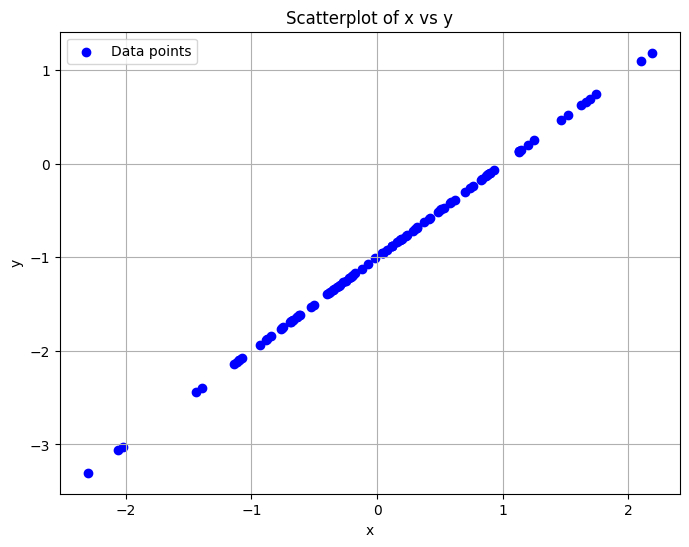

In [36]:
import matplotlib.pyplot as plt

# Create scatterplot of x vs y
plt.figure(figsize=(8,6))
plt.scatter(x, y, color='blue', label='Data points')

# Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatterplot of x vs y')

# Display the scatterplot
plt.legend()
plt.grid(True)
plt.show()


In [37]:
from sklearn.linear_model import LinearRegression

# Reshape x into a 2D array for the model (required by scikit-learn)
x_reshaped = x.reshape(-1, 1)

# Fit the linear regression model
model = LinearRegression()
model.fit(x_reshaped, y)

# Get the estimated coefficients
beta0_hat = model.intercept_
beta1_hat = model.coef_[0]

# Display the estimated coefficients
print(f"Estimated beta0 (intercept): {beta0_hat}")
print(f"Estimated beta1 (slope): {beta1_hat}")

# Compare with the true values
print("\nTrue beta0: -1")
print("True beta1: 0.5")



Estimated beta0 (intercept): -1.0000000000000002
Estimated beta1 (slope): 0.9999999999999999

True beta0: -1
True beta1: 0.5


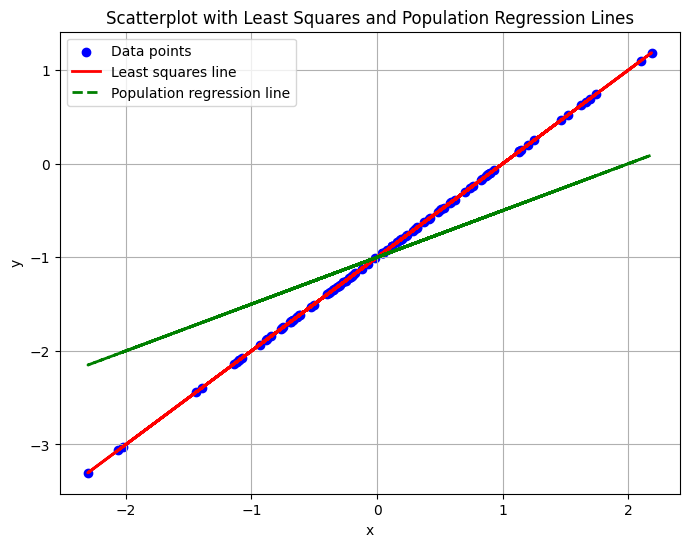

In [38]:
# Predicted values using the least squares line
y_pred = model.predict(x_reshaped)

# Scatterplot of the data
plt.figure(figsize=(8,6))
plt.scatter(x, y, color='blue', label='Data points')

# Plot the least squares line (fitted line)
plt.plot(x, y_pred, color='red', label='Least squares line', linewidth=2)

# Plot the population regression line (true line): Y = -1 + 0.5X
y_true = -1 + 0.5 * x
plt.plot(x, y_true, color='green', label='Population regression line', linestyle='--', linewidth=2)

# Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatterplot with Least Squares and Population Regression Lines')

# Add legend to differentiate the lines
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

In [39]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Reshape x into a 2D array
x_reshaped = x.reshape(-1, 1)

# Create polynomial features (x and x^2)
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x_reshaped)

# Fit the polynomial regression model
poly_model = LinearRegression()
poly_model.fit(x_poly, y)

# Predict y using the polynomial model
y_poly_pred = poly_model.predict(x_poly)

# Calculate R-squared for the polynomial model
r2_poly = r2_score(y, y_poly_pred)

# Fit a simple linear model for comparison
linear_model = LinearRegression()
linear_model.fit(x_reshaped, y)
y_linear_pred = linear_model.predict(x_reshaped)

# Calculate R-squared for the linear model
r2_linear = r2_score(y, y_linear_pred)

# Display R-squared values for both models
print(f"R-squared for linear model: {r2_linear}")
print(f"R-squared for polynomial (degree 2) model: {r2_poly}")

# Compare coefficients
print(f"Polynomial model intercept: {poly_model.intercept_}")
print(f"Polynomial model coefficients: {poly_model.coef_}")

R-squared for linear model: 1.0
R-squared for polynomial (degree 2) model: 1.0
Polynomial model intercept: -1.0
Polynomial model coefficients: [ 0.00000000e+00  1.00000000e+00 -1.86671402e-16]


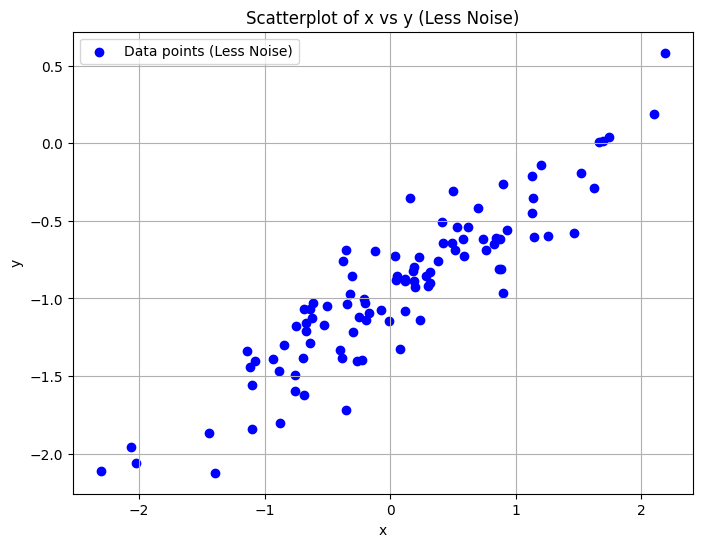

Linear Model:
Estimated beta0 (intercept): -0.9671267753982636
Estimated beta1 (slope): 0.5213381557741978
R-squared for linear model: 0.8317584338641365


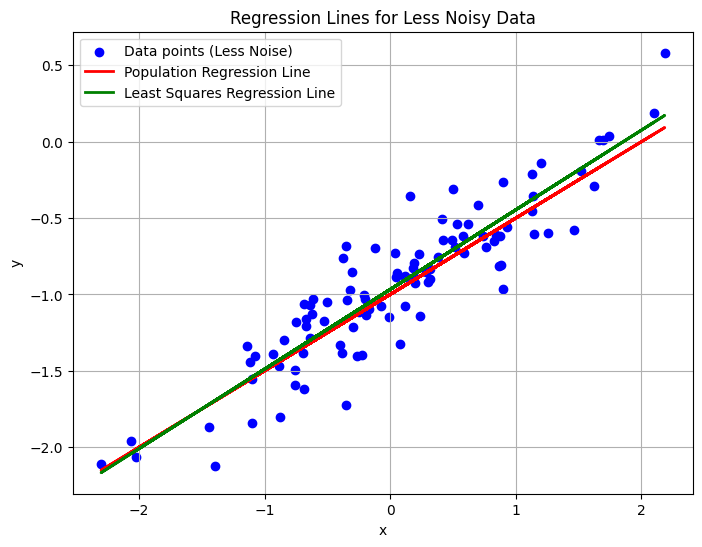

Polynomial Model:
Intercept: -0.9698169289759468
Coefficients: [0.         0.52093398 0.0034486 ]
R-squared for polynomial model: 0.8318154337124162
Comparison of R-squared values:
Linear R-squared: 0.8317584338641365
Polynomial R-squared: 0.8318154337124162


In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

# Step 1: Set random seed for reproducibility
np.random.seed(1)

# Generate 100 observations from N(0, 1) for x
x = np.random.normal(0, 1, 100)

# Step 2: Generate eps from N(0, 0.05) (less noise)
eps = np.random.normal(0, np.sqrt(0.05), 100)

# Step 3: Generate y according to the model Y = -1 + 0.5X + eps
y = -1 + 0.5 * x + eps

# Calculate population y values for the population regression line
y_population = -1 + 0.5 * x

# Step 4: Create a scatterplot for the less noisy data
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', label='Data points (Less Noise)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatterplot of x vs y (Less Noise)')
plt.grid(True)
plt.legend()
plt.show()

# Reshape x for modeling
x_reshaped = x.reshape(-1, 1)

# Step 5: Fit a least squares linear model
linear_model = LinearRegression()
linear_model.fit(x_reshaped, y)
y_linear_pred = linear_model.predict(x_reshaped)

# Calculate R-squared for the linear model
r2_linear = r2_score(y, y_linear_pred)

# Display the estimated coefficients
beta0_hat = linear_model.intercept_
beta1_hat = linear_model.coef_[0]

print(f"Linear Model:\nEstimated beta0 (intercept): {beta0_hat}\nEstimated beta1 (slope): {beta1_hat}")
print(f"R-squared for linear model: {r2_linear}")

# Step 6: Create a second plot with both regression lines
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', label='Data points (Less Noise)')
plt.plot(x, y_population, color='red', label='Population Regression Line', linewidth=2)

# Plot the least squares line
plt.plot(x, y_linear_pred, color='green', label='Least Squares Regression Line', linewidth=2)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Regression Lines for Less Noisy Data')
plt.grid(True)
plt.legend()
plt.show()

# Step 7: Fit a polynomial regression model (degree 2) for comparison
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x_reshaped)

# Fit the polynomial regression model
poly_model = LinearRegression()
poly_model.fit(x_poly, y)

# Predict y using the polynomial model
y_poly_pred = poly_model.predict(x_poly)

# Calculate R-squared for the polynomial model
r2_poly = r2_score(y, y_poly_pred)

# Display coefficients of the polynomial model
print(f"Polynomial Model:\nIntercept: {poly_model.intercept_}\nCoefficients: {poly_model.coef_}")
print(f"R-squared for polynomial model: {r2_poly}")

# Compare R-squared values
print(f"Comparison of R-squared values:\nLinear R-squared: {r2_linear}\nPolynomial R-squared: {r2_poly}")


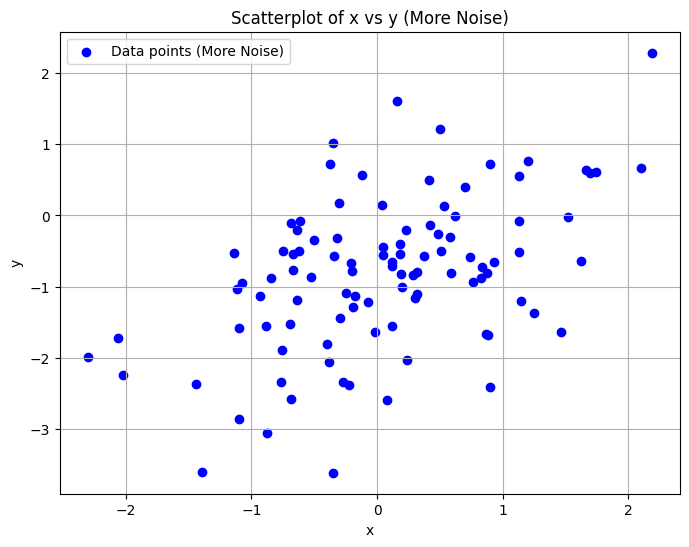

Linear Model:
Estimated beta0 (intercept): -0.8529864703017983
Estimated beta1 (slope): 0.5954271336511716
R-squared for linear model: 0.2438233943025615


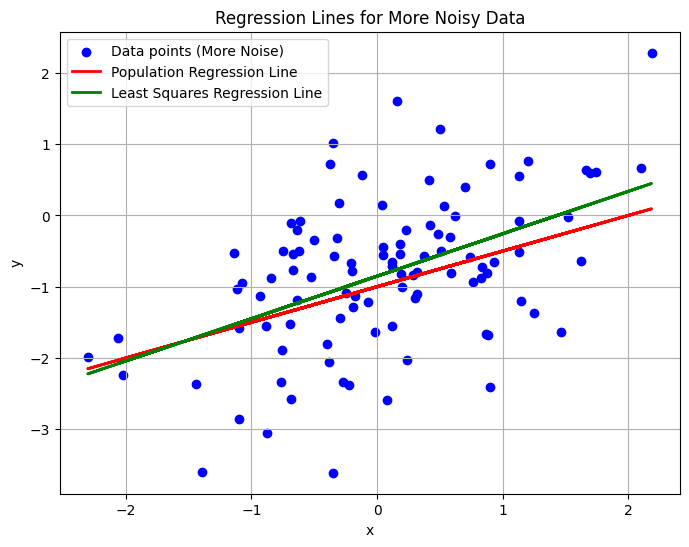

Polynomial Model:
Intercept: -0.8650172028410261
Coefficients: [0.         0.59361962 0.0154226 ]
R-squared for polynomial model: 0.24407958516423378
Comparison of R-squared values:
Linear R-squared: 0.2438233943025615
Polynomial R-squared: 0.24407958516423378


In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

# Step 1: Set random seed for reproducibility
np.random.seed(1)

# Generate 100 observations from N(0, 1) for x
x = np.random.normal(0, 1, 100)

# Step 2: Generate eps from N(0, 1) (more noise)
eps = np.random.normal(0, np.sqrt(1), 100)  # Increase variance

# Step 3: Generate y according to the model Y = -1 + 0.5X + eps
y = -1 + 0.5 * x + eps

# Calculate population y values for the population regression line
y_population = -1 + 0.5 * x

# Step 4: Create a scatterplot for the more noisy data
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', label='Data points (More Noise)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatterplot of x vs y (More Noise)')
plt.grid(True)
plt.legend()
plt.show()

# Reshape x for modeling
x_reshaped = x.reshape(-1, 1)

# Step 5: Fit a least squares linear model
linear_model = LinearRegression()
linear_model.fit(x_reshaped, y)
y_linear_pred = linear_model.predict(x_reshaped)

# Calculate R-squared for the linear model
r2_linear = r2_score(y, y_linear_pred)

# Display the estimated coefficients
beta0_hat = linear_model.intercept_
beta1_hat = linear_model.coef_[0]

print(f"Linear Model:\nEstimated beta0 (intercept): {beta0_hat}\nEstimated beta1 (slope): {beta1_hat}")
print(f"R-squared for linear model: {r2_linear}")

# Step 6: Create a second plot with both regression lines
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', label='Data points (More Noise)')
plt.plot(x, y_population, color='red', label='Population Regression Line', linewidth=2)

# Plot the least squares line
plt.plot(x, y_linear_pred, color='green', label='Least Squares Regression Line', linewidth=2)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Regression Lines for More Noisy Data')
plt.grid(True)
plt.legend()
plt.show()

# Step 7: Fit a polynomial regression model (degree 2) for comparison
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x_reshaped)

# Fit the polynomial regression model
poly_model = LinearRegression()
poly_model.fit(x_poly, y)

# Predict y using the polynomial model
y_poly_pred = poly_model.predict(x_poly)

# Calculate R-squared for the polynomial model
r2_poly = r2_score(y, y_poly_pred)

# Display coefficients of the polynomial model
print(f"Polynomial Model:\nIntercept: {poly_model.intercept_}\nCoefficients: {poly_model.coef_}")
print(f"R-squared for polynomial model: {r2_poly}")

# Compare R-squared values
print(f"Comparison of R-squared values:\nLinear R-squared: {r2_linear}\nPolynomial R-squared: {r2_poly}")


In [48]:
import numpy as np
import statsmodels.api as sm

# Function to fit linear model and get confidence intervals
def get_confidence_intervals(x, y):
    # Add a constant for the intercept
    x = sm.add_constant(x)
    
    # Fit the linear model
    model = sm.OLS(y, x).fit()
    
    # Get confidence intervals
    return model.params, model.conf_int()

# Original Dataset
np.random.seed(1)
x_original = np.random.normal(0, 1, 100)
eps_original = np.random.normal(0, np.sqrt(0.25), 100)  # Variance 0.25
y_original = -1 + 0.5 * x_original + eps_original

beta_original, ci_original = get_confidence_intervals(x_original, y_original)

# Noisier Dataset
eps_noisier = np.random.normal(0, np.sqrt(1), 100)  # Variance 1
y_noisier = -1 + 0.5 * x_original + eps_noisier

beta_noisier, ci_noisier = get_confidence_intervals(x_original, y_noisier)

# Less Noisy Dataset
eps_less_noisy = np.random.normal(0, np.sqrt(0.05), 100)  # Variance 0.05
y_less_noisy = -1 + 0.5 * x_original + eps_less_noisy

beta_less_noisy, ci_less_noisy = get_confidence_intervals(x_original, y_less_noisy)

# Display results
print("Original Dataset Coefficients and Confidence Intervals:")
print(f"Beta0: {beta_original[0]}, Beta1: {beta_original[1]}")
print(f"Confidence Intervals:\n{ci_original}\n")

print("Noisier Dataset Coefficients and Confidence Intervals:")
print(f"Beta0: {beta_noisier[0]}, Beta1: {beta_noisier[1]}")
print(f"Confidence Intervals:\n{ci_noisier}\n")

print("Less Noisy Dataset Coefficients and Confidence Intervals:")
print(f"Beta0: {beta_less_noisy[0]}, Beta1: {beta_less_noisy[1]}")
print(f"Confidence Intervals:\n{ci_less_noisy}\n")


Original Dataset Coefficients and Confidence Intervals:
Beta0: -0.9264932351508991, Beta1: 0.5477135668255857
Confidence Intervals:
[[-1.01974096 -0.83324551]
 [ 0.44261338  0.65281376]]

Noisier Dataset Coefficients and Confidence Intervals:
Beta0: -0.9876906526584721, Beta1: 0.4589413094016393
Confidence Intervals:
[[-1.18948092 -0.78590038]
 [ 0.23150204  0.68638058]]

Less Noisy Dataset Coefficients and Confidence Intervals:
Beta0: -1.003121934817726, Beta1: 0.47637529997664324
Confidence Intervals:
[[-1.05076037 -0.9554835 ]
 [ 0.42268167  0.53006893]]

